# Hometask 4 #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df_flights = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
df_weather = pd.read_csv(url)

In [3]:
df_flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [4]:
df_weather.tail()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
8714,8715,JFK,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0
8715,8716,JFK,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0
8716,8717,JFK,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0
8717,8718,JFK,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0
8718,8719,LGA,2013,8.0,22.0,22.0,75.92,66.92,73.68,210.0,8.05546,9.270062,0.0,1011.9,10.0


## №1 ##

Рассмотрим среднюю задержку в отправлениях в течение дня и сравним со средним количеством полетов в разное время в течение дня

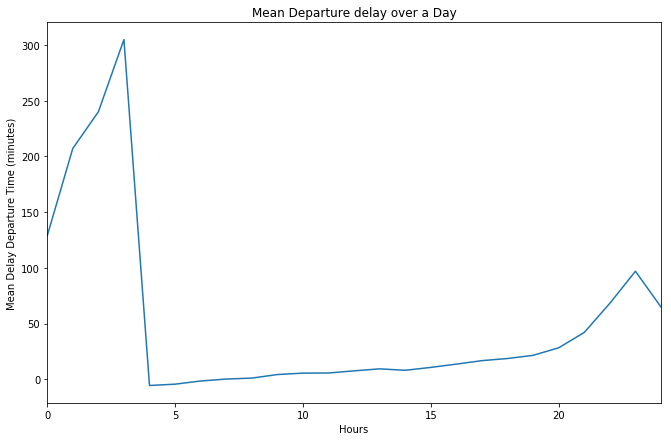

In [5]:
grouped_data = pd.DataFrame(df_flights.groupby([df_flights.hour])['dep_delay'].mean().reset_index(name='Mean_Delay_Departure'))
#print(grouped_data)

plt.figure(figsize=(11, 7))
plt.plot(grouped_data.hour, grouped_data.Mean_Delay_Departure)
plt.xlim(0, 24)
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Hours')
plt.title('Mean Departure delay over a Day')
plt.show()

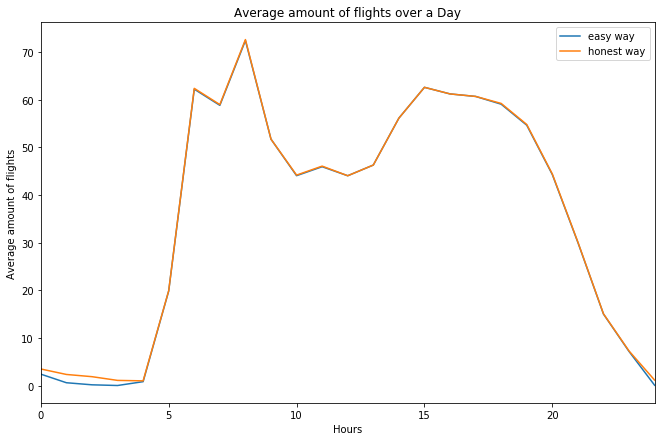

In [6]:
data1 = pd.DataFrame({'hour': range(25), 
                      'Average_amount_of_flights': [df_flights.groupby([df_flights.month, 
                                                                df_flights.day, 
                                                                df_flights.hour]).size()[:, :, i].mean() 
                                            for i in range(25)] })
#print(data1)

data2 = pd.DataFrame({'hour': range(25), 'Amount_of_flights': [len(df_flights[df_flights.hour == i]) / 365 for i in range(25)] })
#print(data2)


plt.figure(figsize=(11, 7))

plt.plot(data2.hour, data2.Amount_of_flights, label = 'easy way')
plt.plot(data1.hour, data1.Average_amount_of_flights, label = 'honest way')
plt.legend()
plt.xlim(0, 24)
plt.ylabel('Average amount of flights')
plt.xlabel('Hours')
plt.title('Average amount of flights over a Day')
plt.show()

По графикам видно, что ночная смена справляется хуже дневной. Но с учетом количества полетов в течение дня аэропорты работают эффективно, ведь в самые напряженные часы задержка отправлений почти отсутствует, т.е. большинство рейсов отправляются в среднем с минимальной задержкой.

## №2 ##

Рассмотрим среднюю задержку в отправлениях в разных месяцах в течение года и сравним со средним количеством полетов за тот же промежуток времени

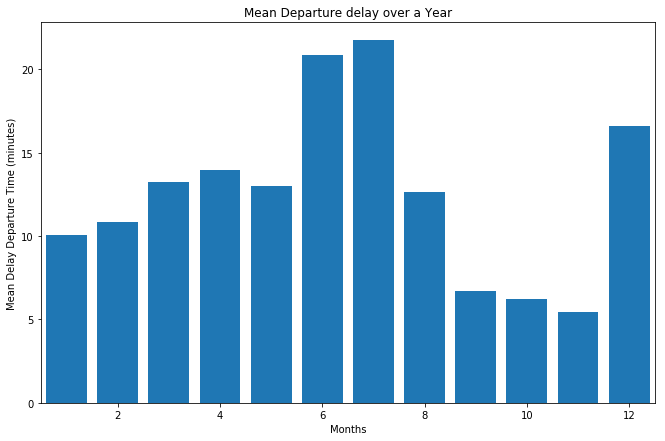

In [7]:
grouped_data_year = pd.DataFrame(df_flights.groupby([df_flights.month])['dep_delay'].mean().reset_index(name='Mean_Delay_Departure'))
#print(grouped_data_year)

plt.figure(figsize=(11, 7))
plt.bar(grouped_data_year.month, grouped_data_year.Mean_Delay_Departure)
plt.xlim(0.5, 12.5)
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Months')
plt.title('Mean Departure delay over a Year')
plt.show()

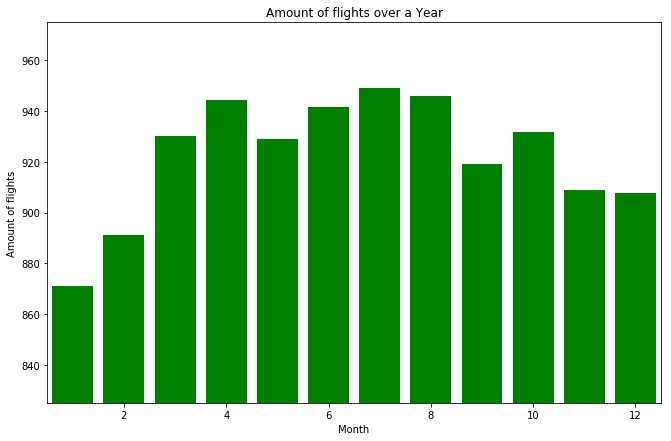

In [8]:
data_by_month = pd.DataFrame({'month': range(1, 13),
                              'amount_of_flights': [df_flights.groupby([df_flights.month, df_flights.day]).size()[i].mean()
                                                    for i in range(1, 13)] })

plt.figure(figsize=(11, 7))
plt.bar(data_by_month.month, data_by_month.amount_of_flights, color = 'g')
plt.xlim(0.5, 12.5)
plt.ylim(825, 975)
plt.ylabel('Amount of flights')
plt.xlabel('Month')
plt.title('Amount of flights over a Year')
plt.show()

Несмотря на незначительное изменение количества полетов, средняяя задержка значительно возрастает летом. Это может быть связано с периодом отпусков который как раз обычно приходится на лето. При этом аэропорты явно рассчитаны на нагрузку, с которой они работают, ведь осенью число полётов почти такое же как и летом, но средняя задержка меньше почти в 3 раза.

## №3 ##

Рассмотрим среднюю задержку в отправлениях в разных аэропортах и сравним со средним количеством полетов, совершаемых через них

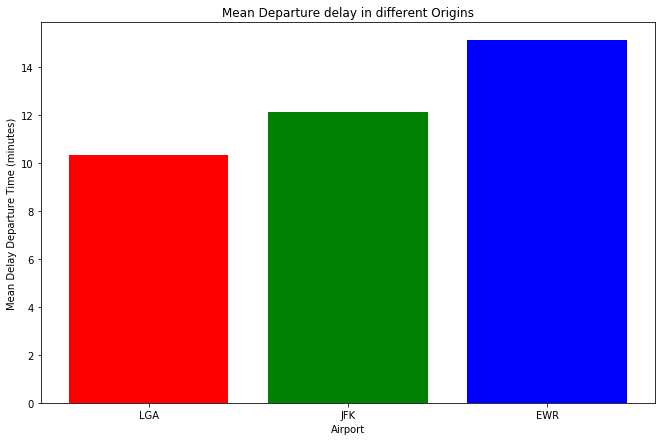

In [9]:
grouped_data_origin = pd.DataFrame(df_flights.groupby([df_flights.origin])['dep_delay']
                                   .mean().reset_index(name='Mean_Delay_Departure')).sort_values(by='Mean_Delay_Departure')

plt.figure(figsize=(11, 7))
plt.bar(grouped_data_origin.origin, grouped_data_origin.Mean_Delay_Departure, color = ('r', 'g', 'b'))
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Airport')
plt.title('Mean Departure delay in different Origins')
plt.show()

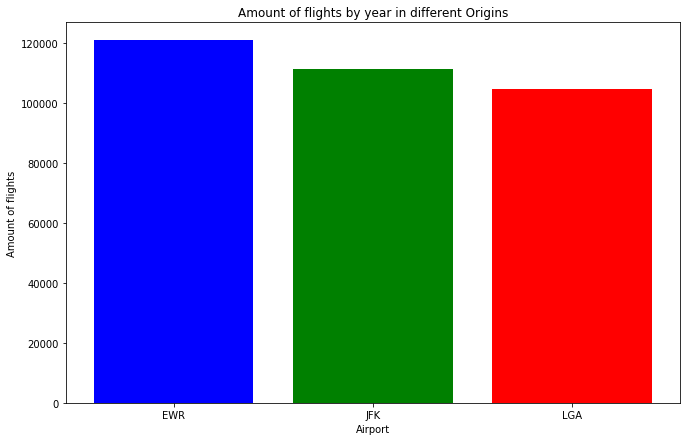

In [10]:
data_by_origin = pd.DataFrame(df_flights.groupby([df_flights.origin]).size().reset_index(name='amount_of_flights'))

plt.figure(figsize=(11, 7))
plt.bar(data_by_origin.origin, data_by_origin.amount_of_flights, color = ('b', 'g', 'r'))
plt.ylabel('Amount of flights')
plt.xlabel('Airport')
plt.title('Amount of flights by year in different Origins')
plt.show()

Тем, кто не любит задержки, стоит рассматривать аэропорт EWR в качестве отправной точки, тем более они производят наибольшее число отправлений. Аэропорт LGA несмотря на меньшую пропускную способность в среднем уступает другим аэропортам по времени задержки рейсов.

## №4 ##

Рассмотрим среднюю задержку в отправлениях и в прибытиях у разных авиакомпаний и посмотрим какие общие задержки имеют различные перевозчики.

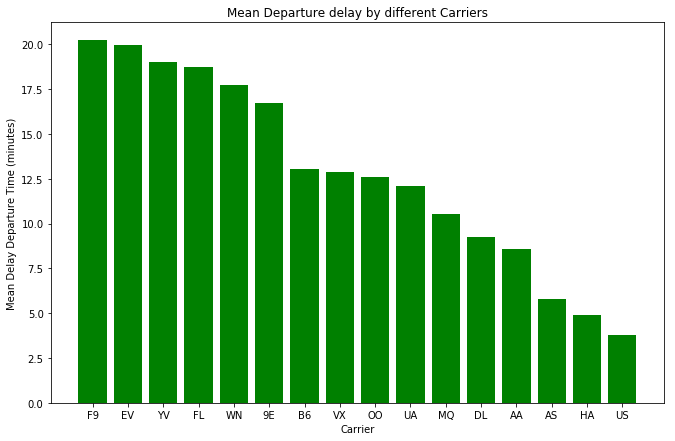

In [11]:
grouped_data_carrier = pd.DataFrame(df_flights.groupby([df_flights.carrier])['dep_delay']
                                    .mean().reset_index(name='Mean_Delay_Departure')).sort_values(by='Mean_Delay_Departure',
                                                                                                  ascending=False)

plt.figure(figsize=(11, 7))
plt.bar(grouped_data_carrier.carrier, grouped_data_carrier.Mean_Delay_Departure, color = 'g')
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Carrier')
plt.title('Mean Departure delay by different Carriers')
plt.show()

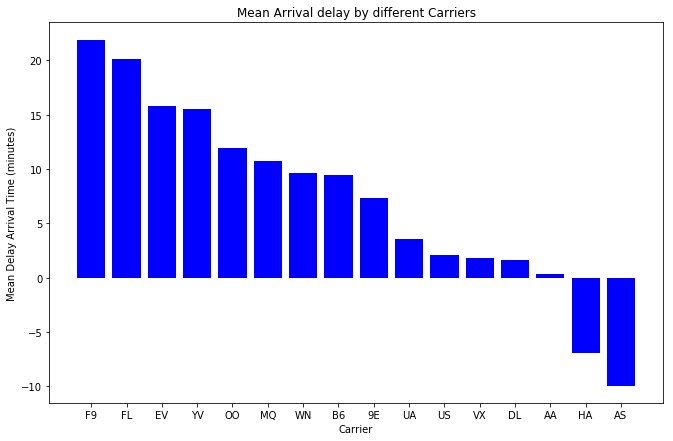

In [12]:
grouped_data_carrier = pd.DataFrame(df_flights.groupby([df_flights.carrier])['arr_delay']
                                    .mean().reset_index(name='Mean_Delay_Arrival')).sort_values(by='Mean_Delay_Arrival',
                                                                                                  ascending=False)

plt.figure(figsize=(11, 7))
plt.bar(grouped_data_carrier.carrier, grouped_data_carrier.Mean_Delay_Arrival, color = 'b')
plt.ylabel('Mean Delay Arrival Time (minutes)')
plt.xlabel('Carrier')
plt.title('Mean Arrival delay by different Carriers')
plt.show()

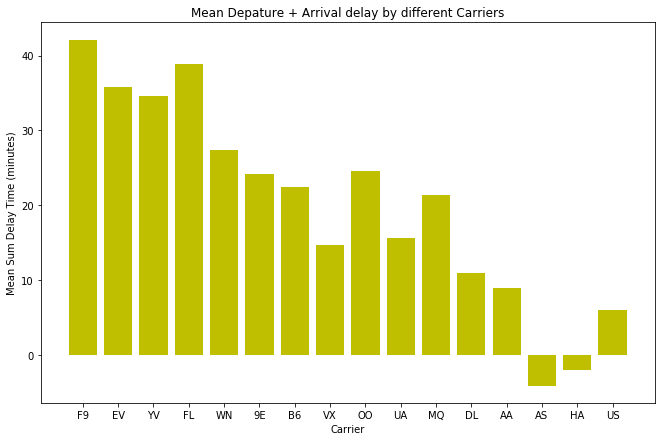

In [13]:
grouped_data_carrier = pd.DataFrame({'Mean_Delay_Arrival': df_flights.groupby([df_flights.carrier])['arr_delay']
                                    .mean(), 
                                     'Mean_Delay_Departure': df_flights.groupby([df_flights.carrier])['dep_delay']
                                    .mean()}).sort_values(by='Mean_Delay_Departure',ascending=False)

plt.figure(figsize=(11, 7))
plt.bar(grouped_data_carrier.index, grouped_data_carrier.Mean_Delay_Arrival + grouped_data_carrier.Mean_Delay_Departure, 
        color = 'y')
plt.ylabel('Mean Sum Delay Time (minutes)')
plt.xlabel('Carrier')
plt.title('Mean Depature + Arrival delay by different Carriers')
plt.show()

Перевозчики F9, EV, FL в среднем задерживают свои рейсы на большее время, чем остальные. Этих операторов не стоит выбирать тем, кто не любит задержек. Им стоит обратить внимание на AS, HA, US

## №5 ##

Для различных авиаперевозчиков рассмотрим количество совершаемых ими полетов и процент отправлений, которые происходят почти вовремя (отличие не более 2 минуты от расписания)

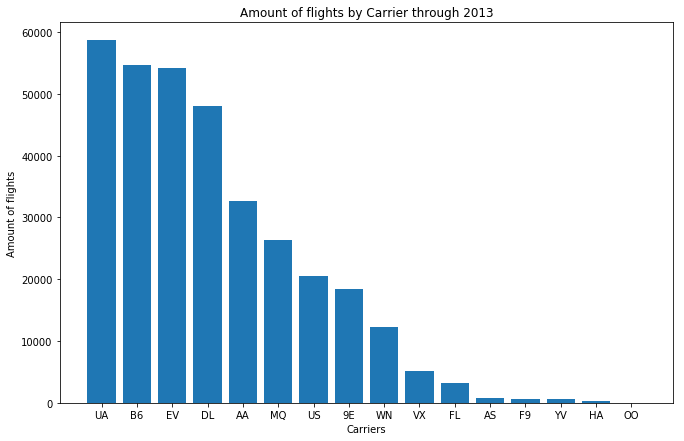

,carrier,Total_Size
11,UA,58665
3,B6,54635
5,EV,54173
4,DL,48110
1,AA,32729
9,MQ,26397
12,US,20536
0,9E,18460
14,WN,12275
13,VX,5162


In [14]:
grouped_career_total = df_flights.groupby([df_flights.carrier]).size().reset_index(name='Total_Size').sort_values(by='Total_Size',ascending=False)

plt.figure(figsize=(11, 7))
plt.bar(grouped_career_total.carrier, grouped_career_total.Total_Size)
plt.ylabel('Amount of flights')
plt.xlabel('Carriers')
plt.title('Amount of flights by Carrier through 2013')
plt.show()

grouped_career_total

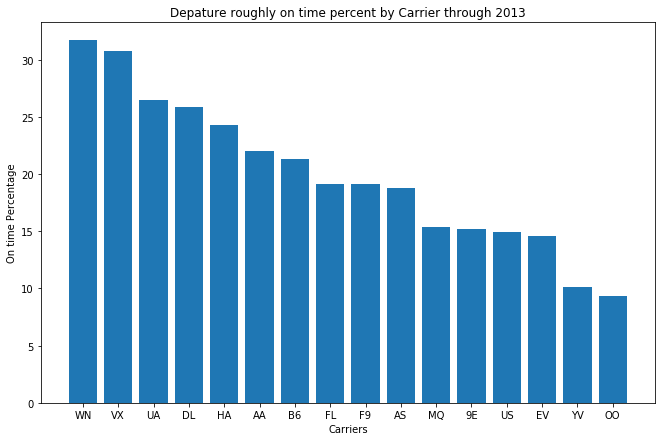

In [15]:
grouped_carrier_total = df_flights.groupby([df_flights.carrier]).size().reset_index(name='Total_Size')

df_flights_filtered_carrier = df_flights[(df_flights.dep_delay.abs() < 3)]  

grouped_carrier_filtered = df_flights_filtered_carrier.groupby([df_flights_filtered_carrier.carrier]).size().reset_index(name='Size')

df_merged = pd.merge(grouped_carrier_filtered, grouped_career_total, on=['carrier'])

df_merged['Percentage_Delays'] = (df_merged.Size / df_merged.Total_Size) * 100
df_merged = df_merged.sort_values(by = 'Percentage_Delays', ascending=False)

plt.figure(figsize=(11, 7))
plt.bar(df_merged.carrier, (df_merged.Size / df_merged.Total_Size) * 100)
plt.ylabel('On time Percentage')
plt.xlabel('Carriers')
plt.title('Depature roughly on time percent by Carrier through 2013')
plt.show()

Перевозчики WN, VX, UA в среднем производят отправления вовремя чаще других. С учетом осуществляемого количества полетов клиенту, заинтересованному в отправлении вовремя, лучше выбирать оператора UA.

## №6 ##

Рассмотрим связаны ли между собой время задержки отправления и дистанция, которую необходимо преодолеть

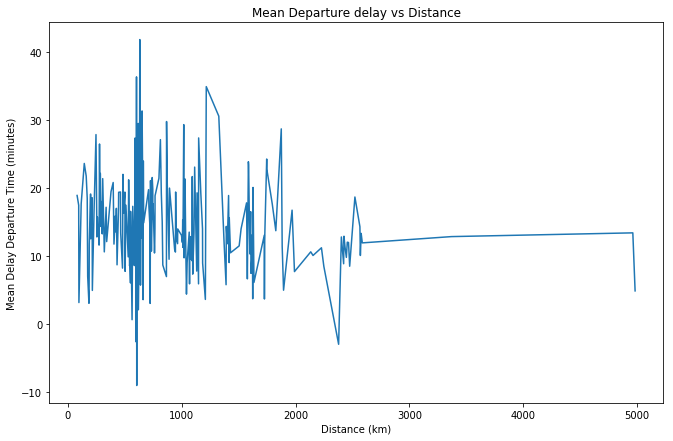

In [16]:
grouped_data_distance = pd.DataFrame(df_flights.groupby([df_flights.distance])['dep_delay'].mean().reset_index(name='Mean_Delay_Departure'))

plt.figure(figsize=(11, 7))
plt.plot(grouped_data_distance.distance, grouped_data_distance.Mean_Delay_Departure)
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Distance (km)')
plt.title('Mean Departure delay vs Distance')
plt.show()

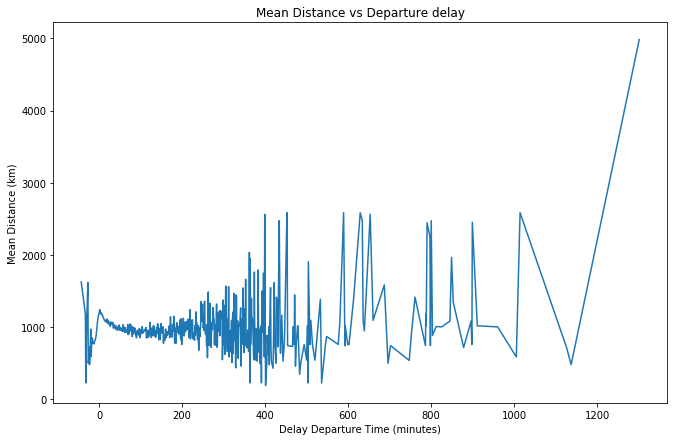

In [17]:
grouped_data_dep_delay = pd.DataFrame(df_flights.groupby([df_flights.dep_delay])['distance'].mean().reset_index(name='Mean_Distance'))

plt.figure(figsize=(11, 7))
plt.plot(grouped_data_dep_delay.dep_delay, grouped_data_dep_delay.Mean_Distance)
plt.ylabel('Mean Distance (km)')
plt.xlabel('Delay Departure Time (minutes)')
plt.title('Mean Distance vs Departure delay')
plt.show()

В общем случае дистанция полёта и его задержка не имеют ярко выраженных зависимостей. Это показывает, что если задержка происходит, то она происходит не из-за факторов подготовки самолёта к вылету связанных с дальностью полёта (заправка топливом, отдых или замена экипажа после длительных перелётов)

## №7 ##

Рассмотрим число задержаных вылетов и время задержек с учетом направления ветра

In [18]:
df_flights_delayed = df_flights[(df_flights.dep_delay>0)] 

grouped_time = df_flights_delayed.groupby([df_flights_delayed.month,
                                           df_flights_delayed.day,
                                           df_flights_delayed.hour])['dep_delay'].agg([np.size, np.mean]).reset_index()

df_weather_flights_merged = pd.merge(grouped_time, df_weather, 
                                     on=['month', 'day', 'hour']).rename(columns={'size': 'Amount', 'mean': 'MeanDelay'})

df_weather_flights_merged.head()

,month,day,hour,Amount,MeanDelay,Unnamed: 0,origin,year,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,1,6.0,9.0,7.777778,6,EWR,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,1,1,7.0,10.0,13.100000,7,EWR,2013,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
2,1,1,8.0,15.0,72.400000,8,EWR,2013,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
3,1,1,9.0,19.0,23.210526,9,EWR,2013,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
4,1,1,10.0,15.0,7.133333,10,EWR,2013,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


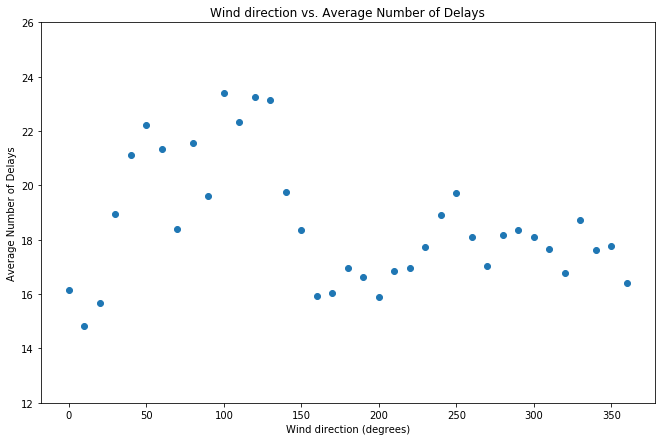

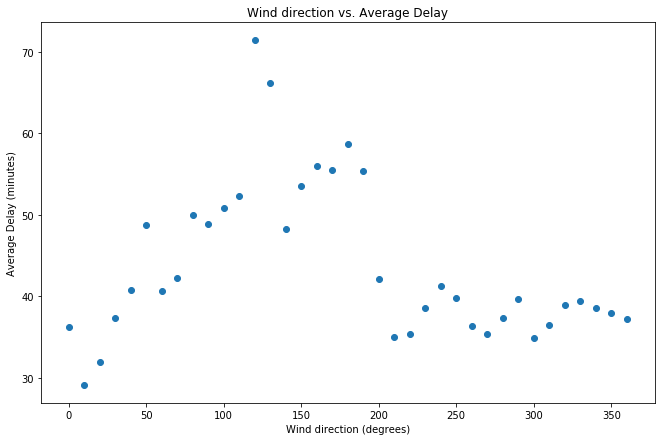

In [19]:
by_wind_dir = df_weather_flights_merged.groupby([df_weather_flights_merged.wind_dir])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()
#print(by_wind_dir.loc[:, ['wind_dir', 'Amount']])

plt.figure(figsize=(11, 7))
plt.scatter(by_wind_dir.wind_dir, by_wind_dir.Amount)
plt.ylim(12, 26)
plt.ylabel('Average Number of Delays')
plt.xlabel('Wind direction (degrees)')
plt.title('Wind direction vs. Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_wind_dir.wind_dir, by_wind_dir.MeanDelay)
#plt.ylim(12, 26)
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Wind direction (degrees)')
plt.title('Wind direction vs. Average Delay')
plt.show()

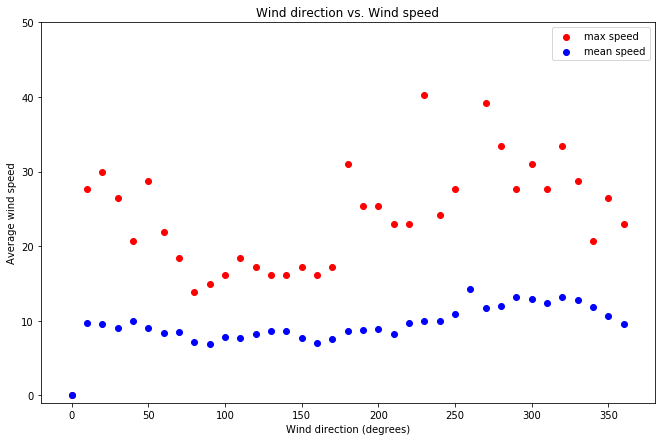

In [20]:
by_wind_dir_speed = df_weather_flights_merged.groupby([df_weather_flights_merged.wind_dir])['wind_speed'].agg([np.mean, np.max]).reset_index()
#print(by_wind_dir_speed)

plt.figure(figsize=(11, 7))
plt.scatter(by_wind_dir_speed.wind_dir, by_wind_dir_speed['amax'], color = 'r', label = 'max speed')
plt.scatter(by_wind_dir_speed.wind_dir, by_wind_dir_speed['mean'], color = 'b', label = 'mean speed')
plt.ylim(-1, 50)
plt.legend()
plt.ylabel('Average wind speed')
plt.xlabel('Wind direction (degrees)')
plt.title('Wind direction vs. Wind speed')
plt.show()

Наиболее неблагоприятное направление ветра для полетов : от 25 до 125 градусов. При таком напрвлении число задержек и сами задержки в среднем больше, чем при остальных направлениях. Хотя в данных направлениях скорость ветра меньше, чем в остальных. Поэтому пассажиру при планировании времени своего полёта стоит учитывать направление ветра.

## №8 ##

Рассмотрим число задержаных вылетов и среднее время задержки с учетом силы ветра

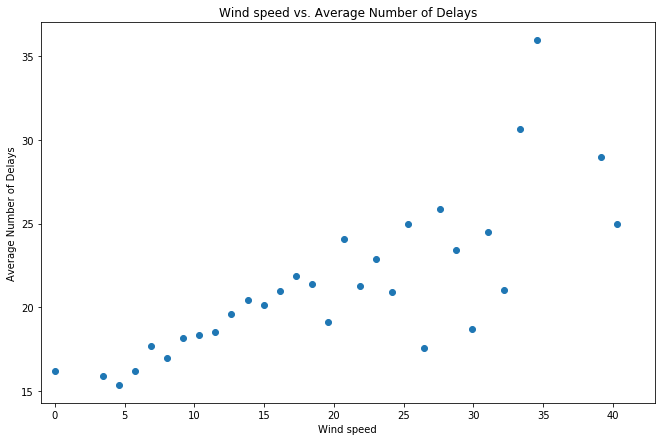

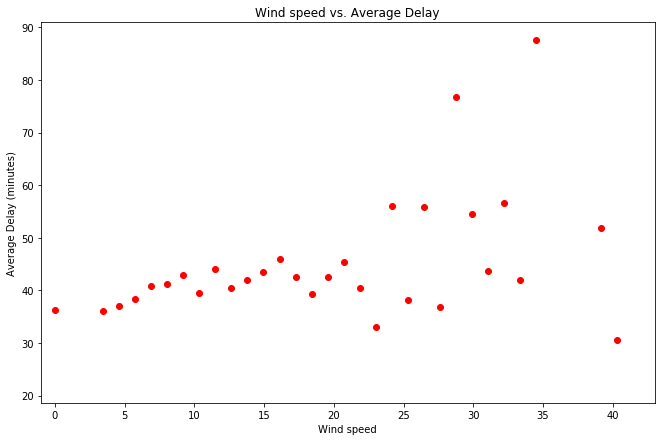

In [21]:
by_wind_speed = df_weather_flights_merged.groupby([df_weather_flights_merged.wind_speed])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()
#print(by_wind_dir.loc[:, ['wind_dir', 'Amount']])

plt.figure(figsize=(11, 7))
plt.scatter(by_wind_speed.wind_speed, by_wind_speed.Amount)
plt.xlim(-1, 43)
plt.ylabel('Average Number of Delays')
plt.xlabel('Wind speed')
plt.title('Wind speed vs. Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_wind_speed.wind_speed, by_wind_speed.MeanDelay, color = 'r')
plt.xlim(-1, 43)
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Wind speed')
plt.title('Wind speed vs. Average Delay')
plt.show()

Видно, что при увеличение скорости ветра до определенного момента среднее число задержек растёт, а время средней задержки остаётся относительно постоянным. При последующем росте скорости ветра среднее время задержки не поддаётся явному предсказанию (т.к. по предыдущему пункту важно также направление ветра). Таким образом, при относительно слабом ветре в случае задержки рейса можно расчитывать на ожидание в районе 40 минут.

## №9 ## 

Рассмотрим число задержаных вылетов с учетом дальности видимости

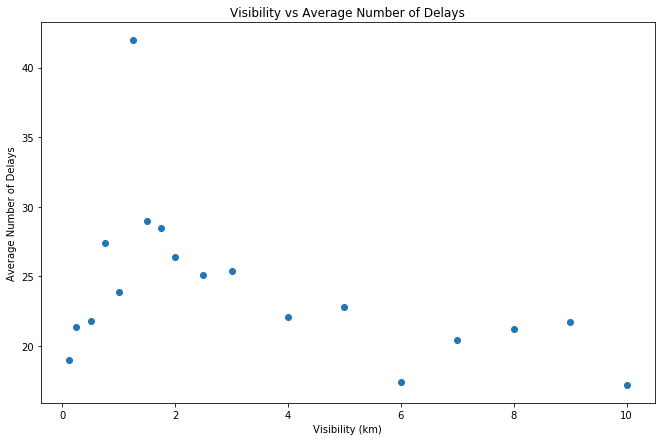

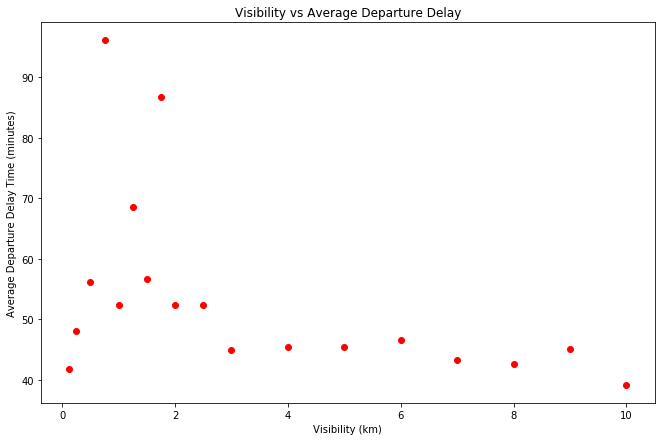

In [22]:
by_visib = df_weather_flights_merged.groupby([df_weather_flights_merged.visib])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()
#print(by_visib)

plt.figure(figsize=(11, 7))
plt.scatter(by_visib.visib, by_visib.Amount)
plt.ylabel('Average Number of Delays')
plt.xlabel('Visibility (km)')
plt.title('Visibility vs Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_visib.visib, by_visib.MeanDelay, color = 'r')
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Visibility (km)')
plt.title('Visibility vs Average Departure Delay')
plt.show()

Как видно из графиков при слабой видимости число задержек и их продолжительность значительно больше, чем в ясную погоду. Таким образом, туман является одним из основных факторов возникновения задержек в расписании вылетов.

## №10 ## 

Рассмотрим число задержаных вылетов с учетом осадков и общей влажности

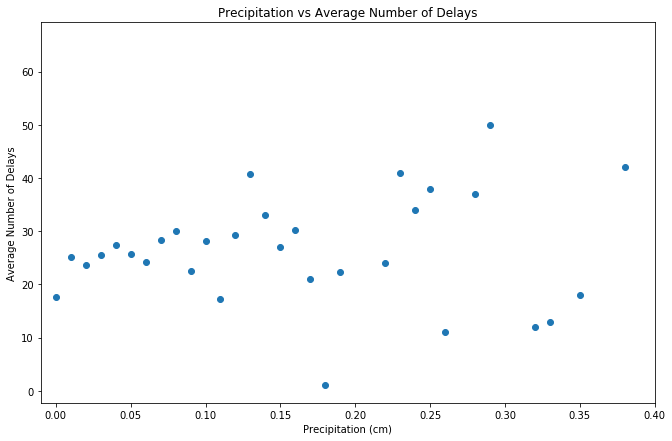

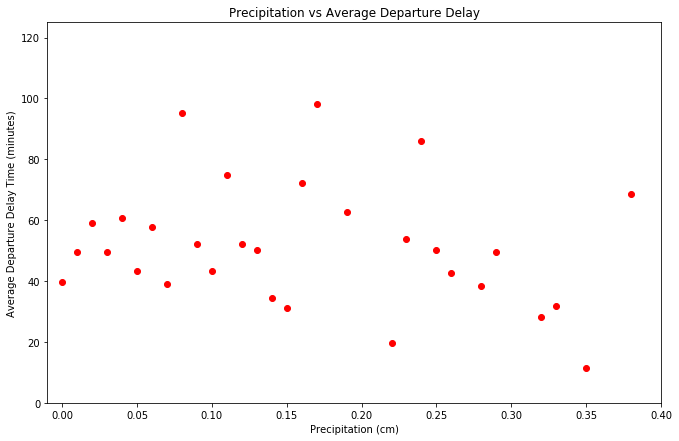

In [23]:
by_precip = df_weather_flights_merged.groupby([df_weather_flights_merged.precip])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()

plt.figure(figsize=(11, 7))
plt.scatter(by_precip.precip, by_precip.Amount)
plt.xlim(-0.01, 0.4)
plt.ylabel('Average Number of Delays')
plt.xlabel('Precipitation (cm)')
plt.title('Precipitation vs Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_precip.precip, by_precip.MeanDelay, color = 'r')
plt.xlim(-0.01, 0.4)
plt.ylim(0, 125)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Precipitation (cm)')
plt.title('Precipitation vs Average Departure Delay')
plt.show()

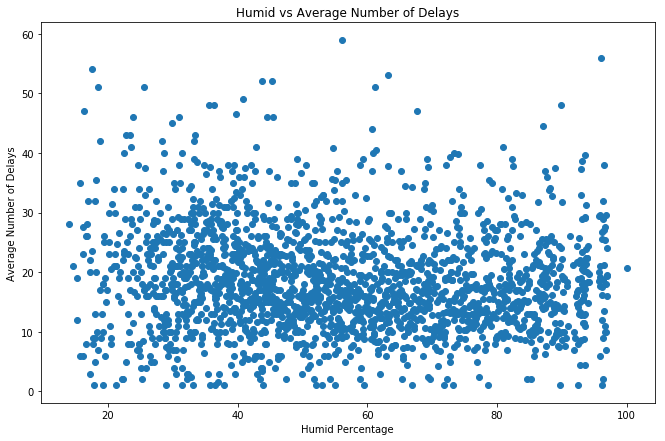

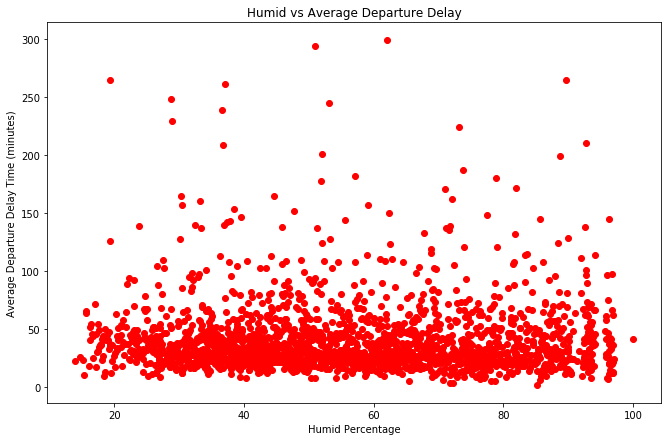

In [24]:
by_humid = df_weather_flights_merged.groupby([df_weather_flights_merged.humid])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()

plt.figure(figsize=(11, 7))
plt.scatter(by_humid.humid, by_humid.Amount)
plt.ylabel('Average Number of Delays')
plt.xlabel('Humid Percentage')
plt.title('Humid vs Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_humid.humid, by_humid.MeanDelay, color = 'r')
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Humid Percentage')
plt.title('Humid vs Average Departure Delay')
plt.show()

Из графиков выше можно сделать вывод, что осадки не оказывают практически никакого влияния на время задержки, то есть самолёты устойчивы к любой влажности воздуха, система очистки и обслуживающий персонал взлётно-посадочной полосы исправно выполняют свою работу.

## №11 ## 

Рассмотрим число задержаных вылетов с учетом температуры воздуха, точки росы и давления

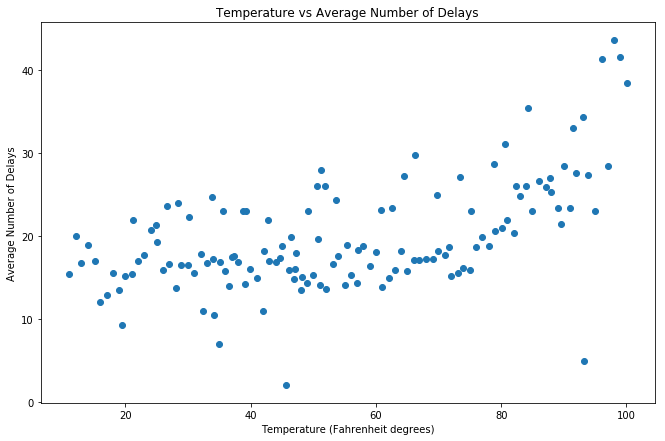

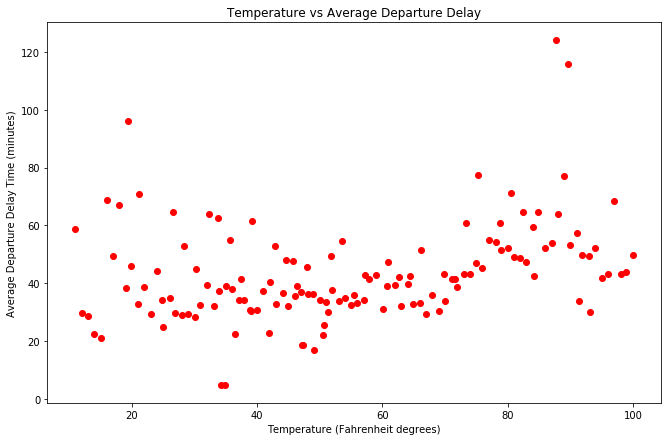

In [25]:
by_temp = df_weather_flights_merged.groupby([df_weather_flights_merged.temp])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()

plt.figure(figsize=(11, 7))
plt.scatter(by_temp.temp, by_temp.Amount)
plt.ylabel('Average Number of Delays')
plt.xlabel('Temperature (Fahrenheit degrees)')
plt.title('Temperature vs Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_temp.temp, by_temp.MeanDelay, color = 'r')
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Temperature (Fahrenheit degrees)')
plt.title('Temperature vs Average Departure Delay')
plt.show()

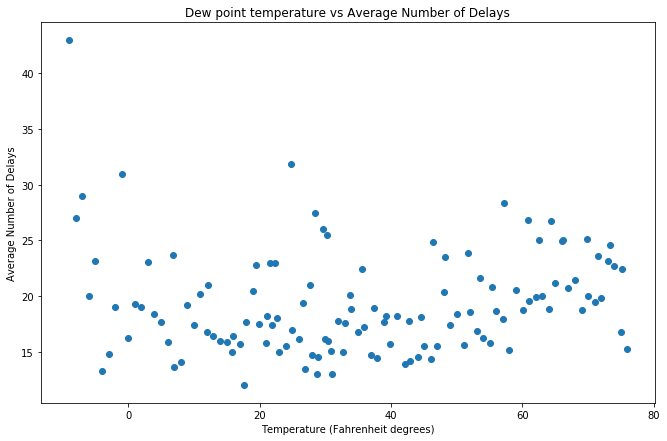

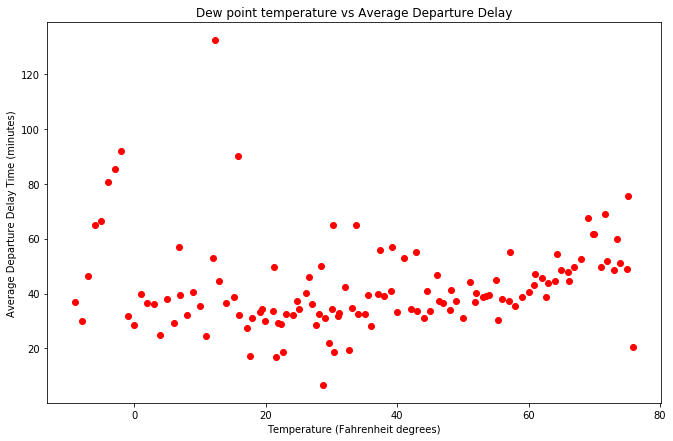

In [26]:
by_dewp = df_weather_flights_merged.groupby([df_weather_flights_merged.dewp])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()

plt.figure(figsize=(11, 7))
plt.scatter(by_dewp.dewp, by_dewp.Amount)
plt.ylabel('Average Number of Delays')
plt.xlabel('Temperature (Fahrenheit degrees)')
plt.title('Dew point temperature vs Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_dewp.dewp, by_dewp.MeanDelay, color = 'r')
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Temperature (Fahrenheit degrees)')
plt.title('Dew point temperature vs Average Departure Delay')
plt.show()

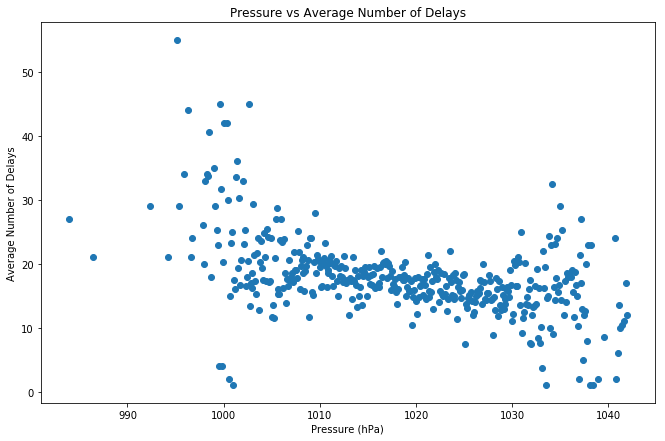

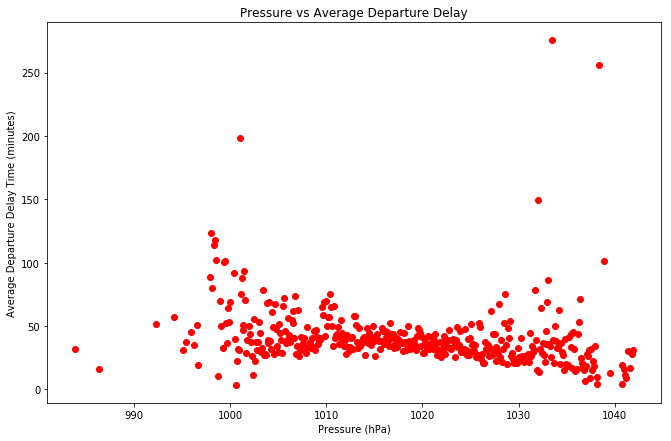

In [27]:
by_pressure = df_weather_flights_merged.groupby([df_weather_flights_merged.pressure])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()

plt.figure(figsize=(11, 7))
plt.scatter(by_pressure.pressure, by_pressure.Amount)
plt.ylabel('Average Number of Delays')
plt.xlabel('Pressure (hPa)')
plt.title('Pressure vs Average Number of Delays')
plt.show()

plt.figure(figsize=(11, 7))
plt.scatter(by_pressure.pressure, by_pressure.MeanDelay, color = 'r')
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Pressure (hPa)')
plt.title('Pressure vs Average Departure Delay')
plt.show()

Температура воздуха, значение точки росы и давление не оказывают напрямую почти никакого влияния на задержки рейсов. В итоге, из всех параметров погоды определяющими для задержек оказались величины связанные со скоростью и направлением ветра, а также дальность видимости.